In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

In [0]:
train = pd.read_csv('/content/drive/My Drive/DATASETS/STD/train.csv')
test  = pd.read_csv('/content/drive/My Drive/DATASETS/STD/test.csv')

In [0]:
train.drop(['name_of_drug', 'use_case_for_drug'], axis = 1, inplace = True)
test.drop(['name_of_drug', 'use_case_for_drug'], axis = 1, inplace = True)

In [0]:
def DatePartition(df):

  day = []
  month = []
  year = []

  for _ in df.drug_approved_by_UIC:
    x = pd.to_datetime(_)
    day.append(x.day)
    month.append(x.month)
    year.append(x.year)

  drug_approved_day = pd.DataFrame(data=day, columns=['drug_approved_date'])
  drug_approved_month = pd.DataFrame(data=month, columns=['drug_approved_month'])
  drug_approved_year = pd.DataFrame(data=year, columns=['drug_approved_year'])

  df = pd.concat([df, drug_approved_day, drug_approved_month, drug_approved_year], axis=1)

  return df

In [0]:
train = DatePartition(train)
test = DatePartition(test)

In [0]:
train.drop('drug_approved_by_UIC', axis = 1, inplace = True)
test.drop('drug_approved_by_UIC', axis = 1, inplace = True)

In [0]:
train.review_by_patient = train.review_by_patient.apply(lambda x : len(x))
test.review_by_patient = test.review_by_patient.apply(lambda x : len(x))

In [584]:
train.head()

,patient_id,review_by_patient,effectiveness_rating,number_of_times_prescribed,base_score,drug_approved_date,drug_approved_month,drug_approved_year
0,206461,79,9,27,8.022969,20,5,2012
1,95260,741,8,192,7.858458,27,4,2010
2,92703,755,5,17,6.341969,14,12,2009
3,35696,719,9,37,6.590176,27,11,2016
4,155963,403,2,43,6.144782,28,11,2015


In [585]:
test.head()

,patient_id,review_by_patient,number_of_times_prescribed,effectiveness_rating,drug_approved_date,drug_approved_month,drug_approved_year
0,163740,439,22,10,28,2,2012
1,39293,782,35,9,5,3,2017
2,208087,300,13,4,3,7,2014
3,23295,407,21,7,18,10,2016
4,97013,243,44,2,13,1,2015


In [0]:
corr = train.drop('patient_id', axis = 1).corr()

In [587]:
corr

,review_by_patient,effectiveness_rating,number_of_times_prescribed,base_score,drug_approved_date,drug_approved_month,drug_approved_year
review_by_patient,1.000000,0.017553,0.025760,-0.001430,-0.005996,-0.000190,0.242496
effectiveness_rating,0.017553,1.000000,0.242224,0.412301,0.009317,-0.029063,-0.197356
number_of_times_prescribed,0.025760,0.242224,1.000000,0.134295,-0.002953,-0.036221,-0.271538
base_score,-0.001430,0.412301,0.134295,1.000000,0.007081,-0.028621,-0.085285
drug_approved_date,-0.005996,0.009317,-0.002953,0.007081,1.000000,-0.019641,-0.012882
drug_approved_month,-0.000190,-0.029063,-0.036221,-0.028621,-0.019641,1.000000,-0.086779
drug_approved_year,0.242496,-0.197356,-0.271538,-0.085285,-0.012882,-0.086779,1.000000


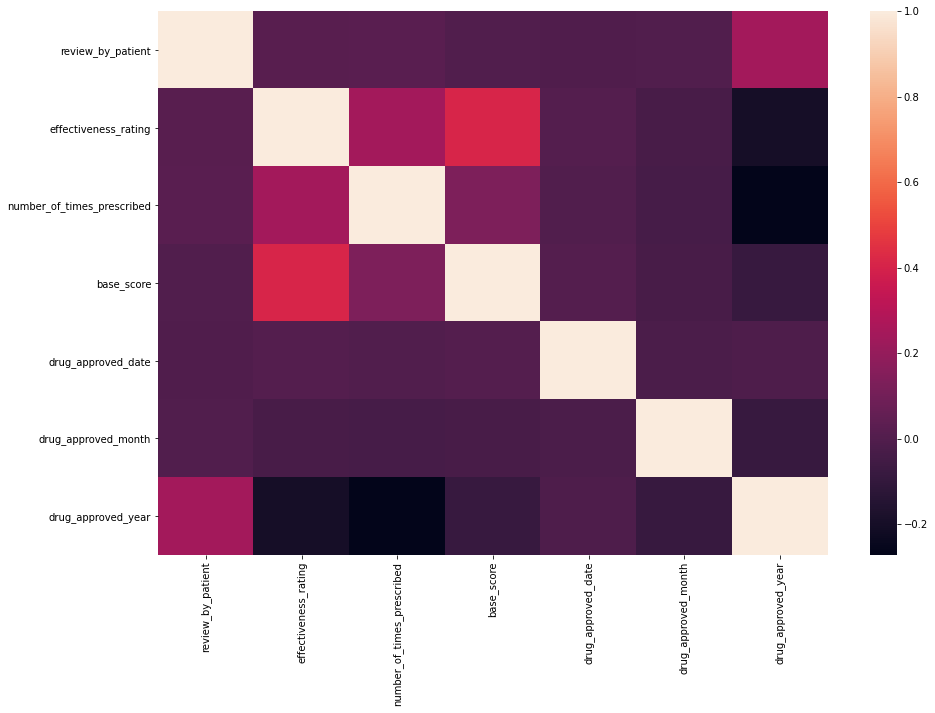

In [588]:
plt.figure(figsize = (15,10))
sns.heatmap(corr)

In [0]:
X = train[['effectiveness_rating', 'number_of_times_prescribed']]
y = train.base_score

# Splitting the Training Data and Imports

In [0]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgbm
import xgboost as xgb

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

# Implementing using xgb.XGBRegressor()

In [0]:
model_xgbr = xgb.XGBRegressor()

In [0]:
params_xgbr = {
    "n_estimators" : [int(x) for x in np.linspace(50, 500, 10)],
    "learning_rate" : [0.001, 0.005, 0.01, 0.05, 0.1],
    "max_depth" : [int(x) for x in np.linspace(10, 110, 11)],
    "min_child_weight" : [3,5,7],
    "colsample_tree" : [1,2]
}

In [0]:
random_xgbr = RandomizedSearchCV(estimator=model_xgbr, param_distributions=params_xgbr, cv=10, verbose=3, random_state=42)

In [597]:
random_xgbr.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=250, min_child_weight=7, max_depth=70, learning_rate=0.1, colsample_tree=2 
[12:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=250, min_child_weight=7, max_depth=70, learning_rate=0.1, colsample_tree=2, score=0.995, total=  14.0s
[CV] n_estimators=250, min_child_weight=7, max_depth=70, learning_rate=0.1, colsample_tree=2 
[12:52:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.0s remaining:    0.0s


[CV]  n_estimators=250, min_child_weight=7, max_depth=70, learning_rate=0.1, colsample_tree=2, score=0.998, total=  13.8s
[CV] n_estimators=250, min_child_weight=7, max_depth=70, learning_rate=0.1, colsample_tree=2 
[12:52:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.9s remaining:    0.0s


[CV]  n_estimators=250, min_child_weight=7, max_depth=70, learning_rate=0.1, colsample_tree=2, score=0.996, total=  13.5s
[CV] n_estimators=250, min_child_weight=7, max_depth=70, learning_rate=0.1, colsample_tree=2 
[12:52:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=250, min_child_weight=7, max_depth=70, learning_rate=0.1, colsample_tree=2, score=0.997, total=  13.5s
[CV] n_estimators=250, min_child_weight=7, max_depth=70, learning_rate=0.1, colsample_tree=2 
[12:53:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=250, min_child_weight=7, max_depth=70, learning_rate=0.1, colsample_tree=2, score=0.998, total=  13.6s
[CV] n_estimators=250, min_child_weight=7, max_depth=70, learning_rate=0.1, colsample_tree=2 
[12:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated i

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 20.4min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'colsample_tree': [1, 2],
                                        'learning_rate': [0.0

In [599]:
random_xgbr.best_params_

{'colsample_tree': 2,
 'learning_rate': 0.1,
 'max_depth': 70,
 'min_child_weight': 7,
 'n_estimators': 250}

In [0]:
model_xgbr = xgb.XGBRegressor(colsample_tree=2, learning_rate=0.1, max_depth=70, min_child_weight=7, n_estimators=250)

In [601]:
model_xgbr.fit(X_train, y_train)

[13:13:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, colsample_tree=2, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=70, min_child_weight=7, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
labels_xgbr = model_xgbr.predict(X_test)

In [603]:
rmse_xgbr = np.sqrt(mean_squared_error(y_test, labels_xgbr))
rmse_xgbr

0.10998201040833262

In [604]:
model_xgbr.fit(X,y)

[13:16:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, colsample_tree=2, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=70, min_child_weight=7, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
predictions_xgbr = model_xgbr.predict(test[X.columns])

# Implementing using lgbm.LGBMRegressor()

In [0]:
model_lgbm = lgbm.LGBMRegressor()

In [0]:
params_lgbm = {
    'num_leaves' : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    "n_estimators" : [int(x) for x in np.linspace(50, 500, 10)],
    "learning_rate" : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
    'max_depth' : [int(x) for x in np.linspace(10, 110, 11)]
}

In [0]:
random_lgbm = RandomizedSearchCV(estimator=model_lgbm, param_distributions=params_lgbm, cv=5, verbose=3, random_state=42)

In [611]:
random_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] num_leaves=55, n_estimators=200, max_depth=40, learning_rate=0.05 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  num_leaves=55, n_estimators=200, max_depth=40, learning_rate=0.05, score=0.992, total=   0.5s
[CV] num_leaves=55, n_estimators=200, max_depth=40, learning_rate=0.05 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  num_leaves=55, n_estimators=200, max_depth=40, learning_rate=0.05, score=0.991, total=   0.5s
[CV] num_leaves=55, n_estimators=200, max_depth=40, learning_rate=0.05 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  num_leaves=55, n_estimators=200, max_depth=40, learning_rate=0.05, score=0.992, total=   0.5s
[CV] num_leaves=55, n_estimators=200, max_depth=40, learning_rate=0.05 
[CV]  num_leaves=55, n_estimators=200, max_depth=40, learning_rate=0.05, score=0.992, total=   0.5s
[CV] num_leaves=55, n_estimators=200, max_depth=40, learning_rate=0.05 
[CV]  num_leaves=55, n_estimators=200, max_depth=40, learning_rate=0.05, score=0.990, total=   0.5s
[CV] num_leaves=5, n_estimators=200, max_depth=50, learning_rate=0.001 
[CV]  num_leaves=5, n_estimators=200, max_depth=50, learning_rate=0.001, score=0.132, total=   0.2s
[CV] num_leaves=5, n_estimators=200, max_depth=50, learning_rate=0.001 
[CV]  num_leaves=5, n_estimators=200, max_depth=50, learning_rate=0.001, score=0.137, total=   0.2s
[CV] num_leaves=5, n_estimators=200, max_depth=50, learning_rate=0.001 
[CV]  num_leaves=5, n_estimators=200, max_depth=50, learning_rate=0.001, score=0.131, total=   0.2s
[CV] num_leaves=5, n_estimators=200, max

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silen...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.0

In [612]:
random_lgbm.best_params_

{'learning_rate': 0.5, 'max_depth': 50, 'n_estimators': 450, 'num_leaves': 25}

In [0]:
model_lgbm = lgbm.LGBMRegressor(learning_rate=0.5, max_depth=50, n_estimators=450, num_leaves=25)

In [614]:
model_lgbm.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.5, max_depth=50,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=450, n_jobs=-1, num_leaves=25, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
labels_lgbm = model_lgbm.predict(X_test)

In [0]:
rmse_lgbm = np.sqrt(mean_squared_error(y_test, labels_lgbm))

In [617]:
rmse_lgbm

0.08843337454558121

In [618]:
model_lgbm.fit(X,y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.5, max_depth=50,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=450, n_jobs=-1, num_leaves=25, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
predictions_lgbm = model_lgbm.predict(test[X.columns])

# Combining Solutions

In [0]:
c_dict = {
    'lgbm' : labels_lgbm,
    'xgbr' : labels_xgbr,
}
combined = pd.DataFrame(data=c_dict)

In [0]:
def stack(df):
  stack_l = []
  for i in range(len(df)):
    stack_l.append((df.lgbm[i] * 0.5 + df.xgbr[i] * 0.5))
  
  return stack_l

In [0]:
avg = stack(combined)

In [0]:
rmse_combined = np.sqrt(mean_squared_error(y_test, avg))

In [629]:
rmse_combined

0.09193697743577045

In [0]:
combined_dict = {
    'lgbm' : predictions_lgbm,
    'xgbr' : predictions_xgbr,
}
combined_preds = pd.DataFrame(data=combined_dict)

In [0]:
predictions = stack(combined_preds)

# Submission

In [0]:
submissions = pd.DataFrame(data=predictions, index=test.patient_id, columns=['base_score'])

In [0]:
submissions.to_csv('submission.csv')